#### setup

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### initial testing, simple model and results

In [2]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import itertools

# Load the Digits dataset
data = load_digits()

X = pd.DataFrame(data.data)
y = pd.Series(data.target)

subset_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # Specify the desired column indices
X = X.iloc[:, subset_indices]

# Get all pairs of digit classes
digit_pairs = list(itertools.permutations(range(10), 2))

# To store results for each pairwise model
results = []
all_models = []

# Train and evaluate a binary classifier for each pair of digits
for digit_1, digit_2 in digit_pairs:
    # Filter data for the current pair of digits
    pair_mask = (y == digit_1) | (y == digit_2)
    X_pair = X[pair_mask]
    y_pair = y[pair_mask].replace({digit_1: 0, digit_2: 1})  # Binary labels: digit_1 -> 0, digit_2 -> 1

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.3, random_state=42)

    # Train a Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    all_models.append(model)

    # Predict and evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    results.append({
        "Digit Pair": f"{digit_1} vs {digit_2}",
        "Train Size": len(X_train),
        "Test Size": len(X_test),
        "Accuracy": accuracy
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print summary statistics
print("Summary Statistics:")
print(results_df.describe())

Summary Statistics:
       Train Size   Test Size   Accuracy
count   90.000000   90.000000  90.000000
mean   251.155556  108.244444   0.862994
std      2.490030    1.063291   0.088678
min    245.000000  106.000000   0.626168
25%    249.000000  108.000000   0.820058
50%    252.000000  108.000000   0.879630
75%    253.000000  109.000000   0.926606
max    255.000000  110.000000   0.990741


#### Kernel Density Estimation (KDE) - (Analogous to KDE section from the paper on Ticket Data)

***(This analysis not included in final paper, as we're mostly interesting in replicating the regularization properties for digits, though it's still interesting to look at)***

The kernel density estimation (KDE) of a univariate probability density function is given by:

$$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

Where:

- $\hat{f}(x)$ is the estimated density at point $x$.
- $n$ is the number of data points.
- $h$ is the bandwidth (smoothing parameter).
- $K$ is the kernel function (e.g., Gaussian kernel).
- $x_i$ are the observed data points.

We select two digit classes from the MNIST dataset and extract their corresponding feature samples for analysis. For each feature in our subset, we compute the kernel density estimates of the feature values for each class separately using a suitable kernel function. By overlaying these KDEs on the same plot, we visually compare the distributions to identify features that effectively discriminate between the two classes.

In [3]:
# # Maybe analogous to the KDE In the paper for the statistical parameters 
# # in the ticket use case. Won't include in original write up. Keeping code.
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_digits

# # Configuration: Specify the digit classes
# class1 = 5
# class2 = 7

# # Load the Digits dataset
# data = load_digits()
# X = pd.DataFrame(data.data)
# y = pd.Series(data.target)

# # Subset the features
# subset_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Smaller subset of features
# X = X.iloc[:, subset_indices]

# # Filter data for the selected pair of digits
# pair_mask = (y == class1) | (y == class2)
# X_pair = X[pair_mask]
# y_pair = y[pair_mask]

# # Combine X and y for plotting
# df = X_pair.copy()
# df['Digit'] = y_pair

# # Plot settings
# num_features = len(subset_indices)
# cols = 3  # Number of plots per row
# rows = (num_features + cols - 1) // cols

# sns.set_style("whitegrid")
# sns.set_palette("muted")

# # Create a color palette with the specified colors
# colors = {class1: 'steelblue', class2: 'darkgray'}

# fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
# axes = axes.flatten()

# for idx, feature in enumerate(X.columns):
#     ax = axes[idx]
    
#     # Plot KDE for class1
#     sns.kdeplot(
#         data=df[df['Digit'] == class1][feature],
#         label=f'Digit {class1}',
#         ax=ax,
#         color='steelblue',
#         shade=True
#     )
    
#     # Plot KDE for class2
#     sns.kdeplot(
#         data=df[df['Digit'] == class2][feature],
#         label=f'Digit {class2}',
#         ax=ax,
#         color='darkgray',
#         shade=True
#     )
    
#     ax.set_title(f'Feature {feature}')
#     ax.legend()

# # Remove any empty subplots
# for idx in range(num_features, rows * cols):
#     fig.delaxes(axes[idx])

# plt.tight_layout()
# plt.show()


#### single `mtry` / `max_features` experiment, regularization, num models + overall accuracy

,Digit Pair,Accuracy Features Only,Accuracy Features + Regularization,Accuracy Improvement with Regularization,Number of Test Examples,Number of Train Examples
89,9 vs 8,0.633803,0.718310,0.084507,71,283
74,8 vs 2,0.816901,0.873239,0.056338,71,280
80,8 vs 9,0.647887,0.704225,0.056338,71,283
88,9 vs 7,0.777778,0.833333,0.055556,72,287
66,7 vs 3,0.726027,0.780822,0.054795,73,289
...,...,...,...,...,...,...
9,1 vs 0,0.861111,0.833333,-0.027778,72,288
83,9 vs 2,0.750000,0.722222,-0.027778,72,285
26,2 vs 9,0.750000,0.722222,-0.027778,72,285
78,8 vs 6,0.943662,0.915493,-0.028169,71,284


Overall Performance:
Total Correct Predictions with Features Only: 5669/6504
Total Correct Predictions with Features + Regularization: 5768/6504


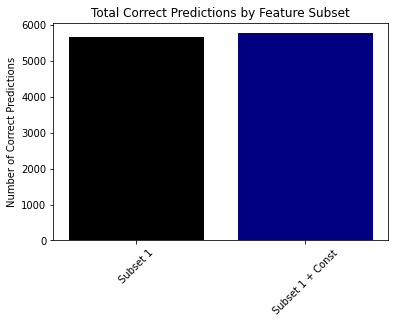

Num improved: 52
Num degraded: 14
Num same: 24


In [4]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Digits dataset
data = load_digits()
X_full = pd.DataFrame(data.data)
y_full = pd.Series(data.target)

# Define the feature subsets
subset_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Smaller subset of features
subset_indices = [2, 3, 4, 5, 11, 12]

# Ensure subset_indices2 is a superset of subset_indices
#assert set(subset_indices).issubset(set(subset_indices2)), "subset_indices2 must be a superset of subset_indices"

# Get all pairs of digit classes
#digit_pairs = list(itertools.combinations(range(10), 2))
digit_pairs = list(itertools.permutations(range(10), 2))

# To store results for each pairwise model
results = []

# Initialize counters for total correct predictions
total_correct = {
    'subset1': 0,
    'subset1_const': 0,
}
total_samples = 0

# Function to train and evaluate model on a given subset of features
def train_evaluate_model(X_train, X_test, feature_subset, add_constants=False):
    # Select the subset of features
    X_train_subset = X_train.iloc[:, feature_subset].copy()
    X_test_subset = X_test.iloc[:, feature_subset].copy()

    if add_constants:
        # Add 20 constant features with the same value (e.g., zero)
        num_constants = 20
        const_value = 0  # or any constant value
        for i in range(num_constants):
            X_train_subset[f'const_{i}'] = const_value
            X_test_subset[f'const_{i}'] = const_value

    # Train the model
    # max features should approach the total number of features, 
    # but still be less, this is when the constant value features give
    # the best performance boost
    model = RandomForestClassifier(random_state=42, 
                                      class_weight='balanced', 
                                      max_features=6,
                                      max_depth=100,
                                      n_estimators=100)
    model.fit(X_train_subset, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    correct_predictions = np.sum(y_pred == y_test)

    return accuracy, correct_predictions, model

all_models = []
all_models_regularization = []

all_correlations = []

# Iterate over each pair of digits
for digit_1, digit_2 in digit_pairs:
    # Filter data for the current pair of digits
    pair_mask = (y_full == digit_1) | (y_full == digit_2)
    X_pair_full = X_full[pair_mask]
    y_pair = y_full[pair_mask].replace({digit_1: 0, digit_2: 1})  # Binary labels

    # Split the data
    X_train_full, X_test_full, y_train, y_test = train_test_split(
        X_pair_full, y_pair, test_size=0.2, random_state=42
    )
    
    # collect the correlations for the features to the target for each pair dataset
    # ie for each model
    vv = X_train_full[subset_indices]
    correlations = {col: abs(vv[col].corr(y_train)) for col in vv.columns.values}
    all_correlations.append(correlations)
    
    # Keep track of total samples
    total_samples += len(y_test)

    # Train and evaluate models
    # Subset 1 without constants
    acc1, correct1, model = train_evaluate_model(X_train_full, X_test_full, subset_indices, add_constants=False)
    total_correct['subset1'] += correct1
    all_models.append(model)

    # Subset 1 with constants
    acc1_const, correct1_const, model_const = train_evaluate_model(X_train_full, 
                                                                   X_test_full, subset_indices, add_constants=True)
    total_correct['subset1_const'] += correct1_const
    all_models_regularization.append(model_const)

    # Improvement for subset 1
    improvement1 = acc1_const - acc1

    # Store the results
    results.append({
        "Digit Pair": f"{digit_1} vs {digit_2}",
        "Accuracy Features Only": acc1,
        "Accuracy Features + Regularization": acc1_const,
        "Accuracy Improvement with Regularization": improvement1,
        "Number of Test Examples": len(X_test_full),
        "Number of Train Examples": len(X_train_full)
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy Improvement with Regularization', ascending=False)
display(results_df)

# Print overall statistics
print("Overall Performance:")
print(f"Total Correct Predictions with Features Only: {total_correct['subset1']}/{total_samples}")
print(f"Total Correct Predictions with Features + Regularization: {total_correct['subset1_const']}/{total_samples}")

# Plotting the bar chart of overall performance
labels = ['Subset 1', 'Subset 1 + Const']
correct_predictions = [
    total_correct['subset1'],
    total_correct['subset1_const'],
]

plt.bar(labels, correct_predictions, color=['black', 'navy', 'gray', 'lightgray'])
plt.title('Total Correct Predictions by Feature Subset')
plt.ylabel('Number of Correct Predictions')
plt.xticks(rotation=45)
plt.show()

a = len(results_df[results_df["Accuracy Improvement with Regularization"] > 0])
b = len(results_df[results_df["Accuracy Improvement with Regularization"] < 0])
c = len(results_df[results_df["Accuracy Improvement with Regularization"] == 0])
print("Num improved: " + str(a))
print("Num degraded: " + str(b))
print("Num same: " + str(c))

In [5]:
# Extract unique acts from the "act Pair" column
print("Num Digit Pairs - " + str(len(digit_pairs)))
unique_acts = set()
results_df['Digit Pair'].str.split(' vs ').apply(unique_acts.update)
print("Unique Digits - " + str(len(unique_acts)))

print("Average number of Testing and Training examples per model")
print(results_df['Number of Test Examples'].mean())
print(results_df['Number of Train Examples'].mean())

Num Digit Pairs - 90
Unique Digits - 10
Average number of Testing and Training examples per model
72.26666666666667
287.1333333333333


In [6]:
# Can compare this with the iteration over max_features below to double check results

print(results_df["Accuracy Features Only"].mean())
print(results_df["Accuracy Features + Regularization"].mean())

0.8713069555503152
0.8864755206360778


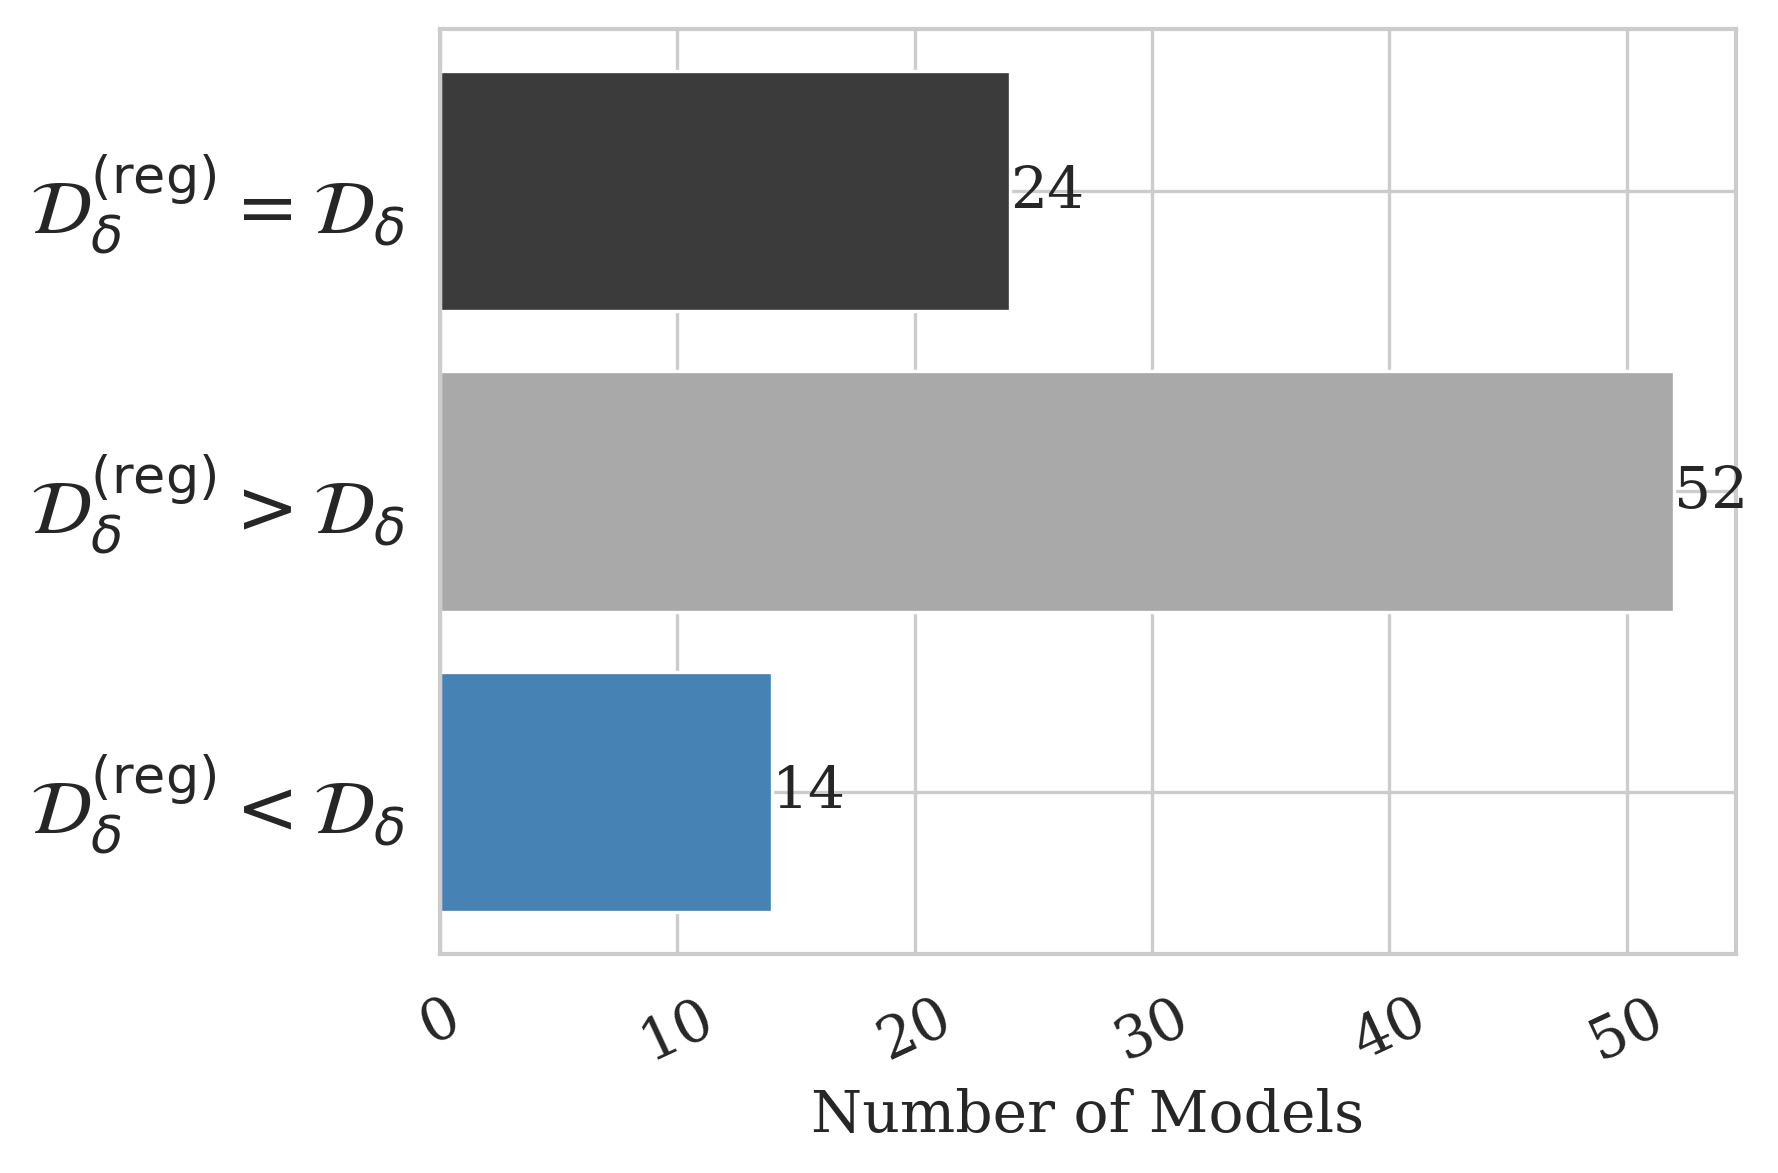

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator  
import pandas as pd
from scipy.stats import beta
import seaborn as sns

import matplotlib
#matplotlib.use('Agg')

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])

fsize = 14

df = results_df
total_examples = len(df)

# Print mean accuracies for all four accuracy columns
# print("Mean Accuracy (Subset1 Only):", df["Accuracy Subset1 Only"].mean())
# print("Mean Accuracy (Subset2 Only):", df["Accuracy Subset2 Only"].mean())

# 1) Subset2 vs Subset1: No Const
counts_no_const = {
    r"$\mathcal{D}_{\delta}^{(\mathrm{reg})} = \mathcal{D}_{\delta}$": len(df[df["Accuracy Improvement with Regularization"] == 0]),
    r"$\mathcal{D}_{\delta}^{(\mathrm{reg})} > \mathcal{D}_{\delta}$": len(df[df["Accuracy Improvement with Regularization"] > 0]),
    r"$\mathcal{D}_{\delta}^{(\mathrm{reg})} < \mathcal{D}_{\delta}$": len(df[df["Accuracy Improvement with Regularization"] < 0])
}

# Combine all counts into one dictionary
counts_combined = {**counts_no_const}

categories = list(counts_combined.keys())
values = list(counts_combined.values())
colors = ['#3b3b3b', 'darkgray', 'steelblue'] * len(categories)

#plt.figure(figsize=(8, 6), facecolor="white")  # Set background to white

plt.figure(dpi=300, facecolor="white")
bars = plt.barh(categories, values, color=colors)
plt.xlabel('Number of Models', fontsize=fsize)

plt.xticks(fontsize=fsize, rotation = 25)
plt.yticks(fontsize=18)

#plt.xlim(0, 5000)
#plt.ylabel('Comparisons')
#plt.title(r'Performance Comparisons of Random Forest Models ($N_{models} = 90$)')
plt.gca().invert_yaxis()  # Invert y-axis so the first category is on top
#plt.grid()

# Adding the numbers at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', 
             ha='left', fontsize=fsize)

#plt.show()
#plt.tight_layout()
#plt.savefig("regularization_improvement_digits.png", format="png", dpi=150, bbox_inches='tight')  # Adjust dpi for resolu

plt.tight_layout()

# Save figure
plt.savefig(
    'regularization_improvement_digits.eps',
    format='eps',
    dpi=300,
    pad_inches=.1,  # or 0.1, 0.3, etc.
    bbox_inches='tight'
)

#### single `mtry` / `max_features` experiment, regularization - feature usage, tree depth, tree variety

In [8]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Digits dataset
data = load_digits()
X_full = pd.DataFrame(data.data)
y_full = pd.Series(data.target)

# Define the feature subsets
subset_indices = np.arange(len(X_full.columns)) # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Smaller subset of features
subset_indices = [2, 3, 4, 5, 11, 12]

# Ensure subset_indices2 is a superset of subset_indices
#assert set(subset_indices).issubset(set(subset_indices2)), "subset_indices2 must be a superset of subset_indices"

# Get feature names
feature_names_full = X_full.columns

# Feature names for subsets
feature_names_subset1 = feature_names_full[subset_indices]

# Initialize cumulative feature usage counts
total_feature_usage_subset1 = np.zeros(len(subset_indices))
total_feature_usage_subset1_const = np.zeros(len(subset_indices))

# Get all pairs of digit classes
#digit_pairs = list(itertools.combinations(range(10), 2))
digit_pairs = list(itertools.permutations(range(10), 2))


# To store results for each pairwise model
results = []

# Initialize counters for total correct predictions
total_correct = {
    'subset1': 0,
    'subset1_const': 0,
}
total_samples = 0

all_models = []
all_models_regularization = []
all_correlations = []

# Iterate over each pair of digits
for digit_1, digit_2 in digit_pairs:
    # Filter data for the current pair of digits
    pair_mask = (y_full == digit_1) | (y_full == digit_2)
    X_pair_full = X_full[pair_mask]
    y_pair = y_full[pair_mask].replace({digit_1: 0, digit_2: 1})  # Binary labels

    # Split the data
    X_train_full, X_test_full, y_train, y_test = train_test_split(
        X_pair_full, y_pair, test_size=0.2, random_state=42
    )
    
    # collect the correlations for the features to the target for each pair dataset
    # ie for each model
    #vv = X_train_full[subset_indices]
    vv = X_train_full.iloc[:, subset_indices].copy()
    correlations = {col: abs(vv[col].corr(y_train)) for col in vv.columns.values}
    all_correlations.append(correlations)
    
    # Keep track of total samples
    total_samples += len(y_test)

    # Function to train and evaluate model on a given subset of features
    def train_evaluate_model(X_train, X_test, feature_subset, add_constants=False):
        # Select the subset of features
        X_train_subset = X_train.iloc[:, feature_subset].copy()
        X_test_subset = X_test.iloc[:, feature_subset].copy()
        
        if add_constants:
            # Add 20 constant features with the same value (e.g., zero)
            num_constants = 20
            const_value = 5  # or any constant value
            for i in range(num_constants):
                const_col_name = f'const_{i}'
                X_train_subset[const_col_name] = const_value
                X_test_subset[const_col_name] = const_value
        
        # Train the model
        model = RandomForestClassifier(random_state=42, 
                                          class_weight='balanced', 
                                          max_features=6,
                                          max_depth=100,
                                          n_estimators=100)
        model.fit(X_train_subset, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test_subset)
        accuracy = accuracy_score(y_test, y_pred)
        correct_predictions = np.sum(y_pred == y_test)
        
        return accuracy, correct_predictions, model, X_train_subset.columns

    # Train and evaluate models
    # Subset 1 without constants
    acc1, correct1, model_subset1, feature_cols_subset1 = train_evaluate_model(
        X_train_full, X_test_full, subset_indices, add_constants=False)
    total_correct['subset1'] += correct1
    all_models.append(model_subset1)

    # Subset 1 with constants
    acc1_const, correct1_const, model_subset1_const, feature_cols_subset1_const = train_evaluate_model(
        X_train_full, X_test_full, subset_indices, add_constants=True)
    total_correct['subset1_const'] += correct1_const
    all_models_regularization.append(model_subset1_const)

    # Improvement for subset 1
    improvement1 = acc1_const - acc1

    # Store the results
    results.append({
        "Digit Pair": f"{digit_1} vs {digit_2}",
        "Accuracy Subset 1": acc1,
        "Accuracy Subset 1 + Const": acc1_const,
        "Improvement Subset 1": improvement1,
        "Number of Test Examples": len(X_test_full),
        "Number of Train Examples": len(X_train_full)
    })

    # Collect feature usage counts
    def collect_feature_usage(model, num_original_features):
        # Initialize feature usage counts
        feature_usage = np.zeros(num_original_features)
        
        # Iterate through each tree in the Random Forest model
        for tree in model.estimators_:
            tree_features = tree.tree_.feature
            for feature_used in tree_features:
                if feature_used >= 0 and feature_used < num_original_features:
                    feature_usage[feature_used] += 1
        return feature_usage

    # For Subset 1 without constants
    num_features_subset1 = len(subset_indices)
    feature_usage_subset1 = collect_feature_usage(model_subset1, num_features_subset1)
    total_feature_usage_subset1 += feature_usage_subset1
    
    # DEBUG
    #print(feature_usage_subset1)

    # For Subset 1 with constants
    feature_usage_subset1_const = collect_feature_usage(model_subset1_const, num_features_subset1)
    total_feature_usage_subset1_const += feature_usage_subset1_const

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
#display(results_df)

# Print overall statistics
print("Overall Performance:")
print(f"Total Correct Predictions with Subset 1: {total_correct['subset1']}/{total_samples}")
print(f"Total Correct Predictions with Subset 1 + Constants: {total_correct['subset1_const']}/{total_samples}")

Overall Performance:
Total Correct Predictions with Subset 1: 5669/6504
Total Correct Predictions with Subset 1 + Constants: 5768/6504


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


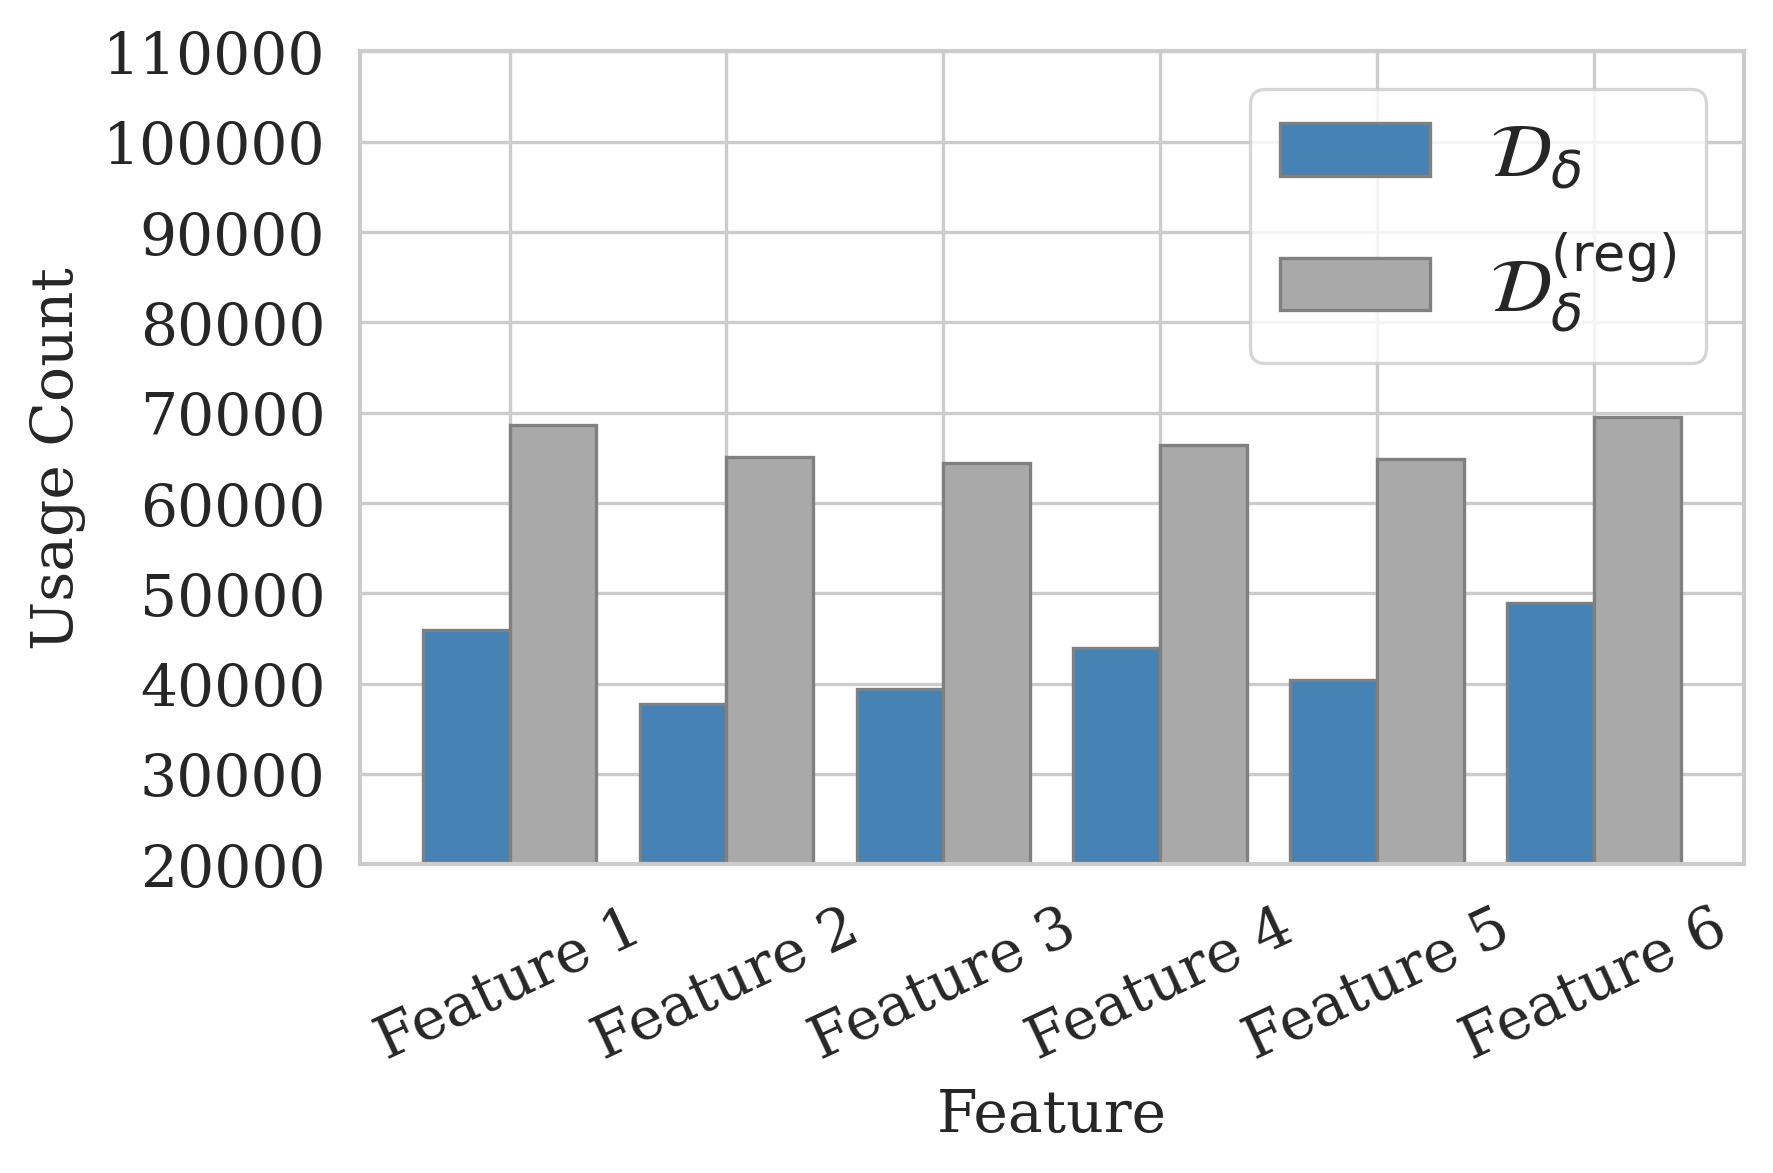

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])

fsize = 14  # Base font size for labels and ticks

# --- Data for plotting ---
#   feature_names_subset1: list of feature names (strings)
#   total_feature_usage_subset1: usage counts without regularization
#   total_feature_usage_subset1_const: usage counts with regularization

subs1 = total_feature_usage_subset1
subs2 = total_feature_usage_subset1_const
fns1 = feature_names_subset1
indices1 = np.arange(len(subs1))

# --- Create figure ---
# Use a larger figure size with high DPI and a white background
plt.figure(dpi=300, facecolor="white")

# --- X-tick labels ---
# Here we use custom labels (e.g., "Feature 1", "Feature 2", etc.)
xtick_labels = [f"Feature {i+1}" for i in range(len(indices1))]

# --- Plot the data ---
plt.bar(indices1 - 0.2, subs1, width=0.4, label=r'$\mathcal{D}_{\delta}$',
        color='steelblue', edgecolor='gray', alpha=1)
plt.bar(indices1 + 0.2, subs2, width=0.4, label=r'$\mathcal{D}_{\delta}^{(\mathrm{reg})}$',
        color='darkgray', edgecolor='gray', alpha=1)

# --- Labeling and ticks ---
plt.xlabel(r'Feature', fontsize=fsize)
plt.ylabel(r'Usage Count', fontsize=fsize)
plt.xticks(indices1, xtick_labels, rotation=25, fontsize=fsize)
plt.yticks(fontsize=fsize)

plt.ylim(20000, 110000)

# Position the legend outside the main plot area
plt.legend(loc='upper right',fontsize=18)

# Add grid lines and adjust layout
#plt.grid()
plt.tight_layout()

# --- Save the figure ---
# Save in both EPS and PNG formats with high resolution
plt.savefig('regularization_feature_usage_digits.eps', format='eps',
            dpi=300, pad_inches=.1, bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


All Models Median Depth: 8.0
All Models Average Depth: 8.350222222222222
Regularized Models Median Depth: 10.0
Regularized Models Average Depth: 10.423111111111112


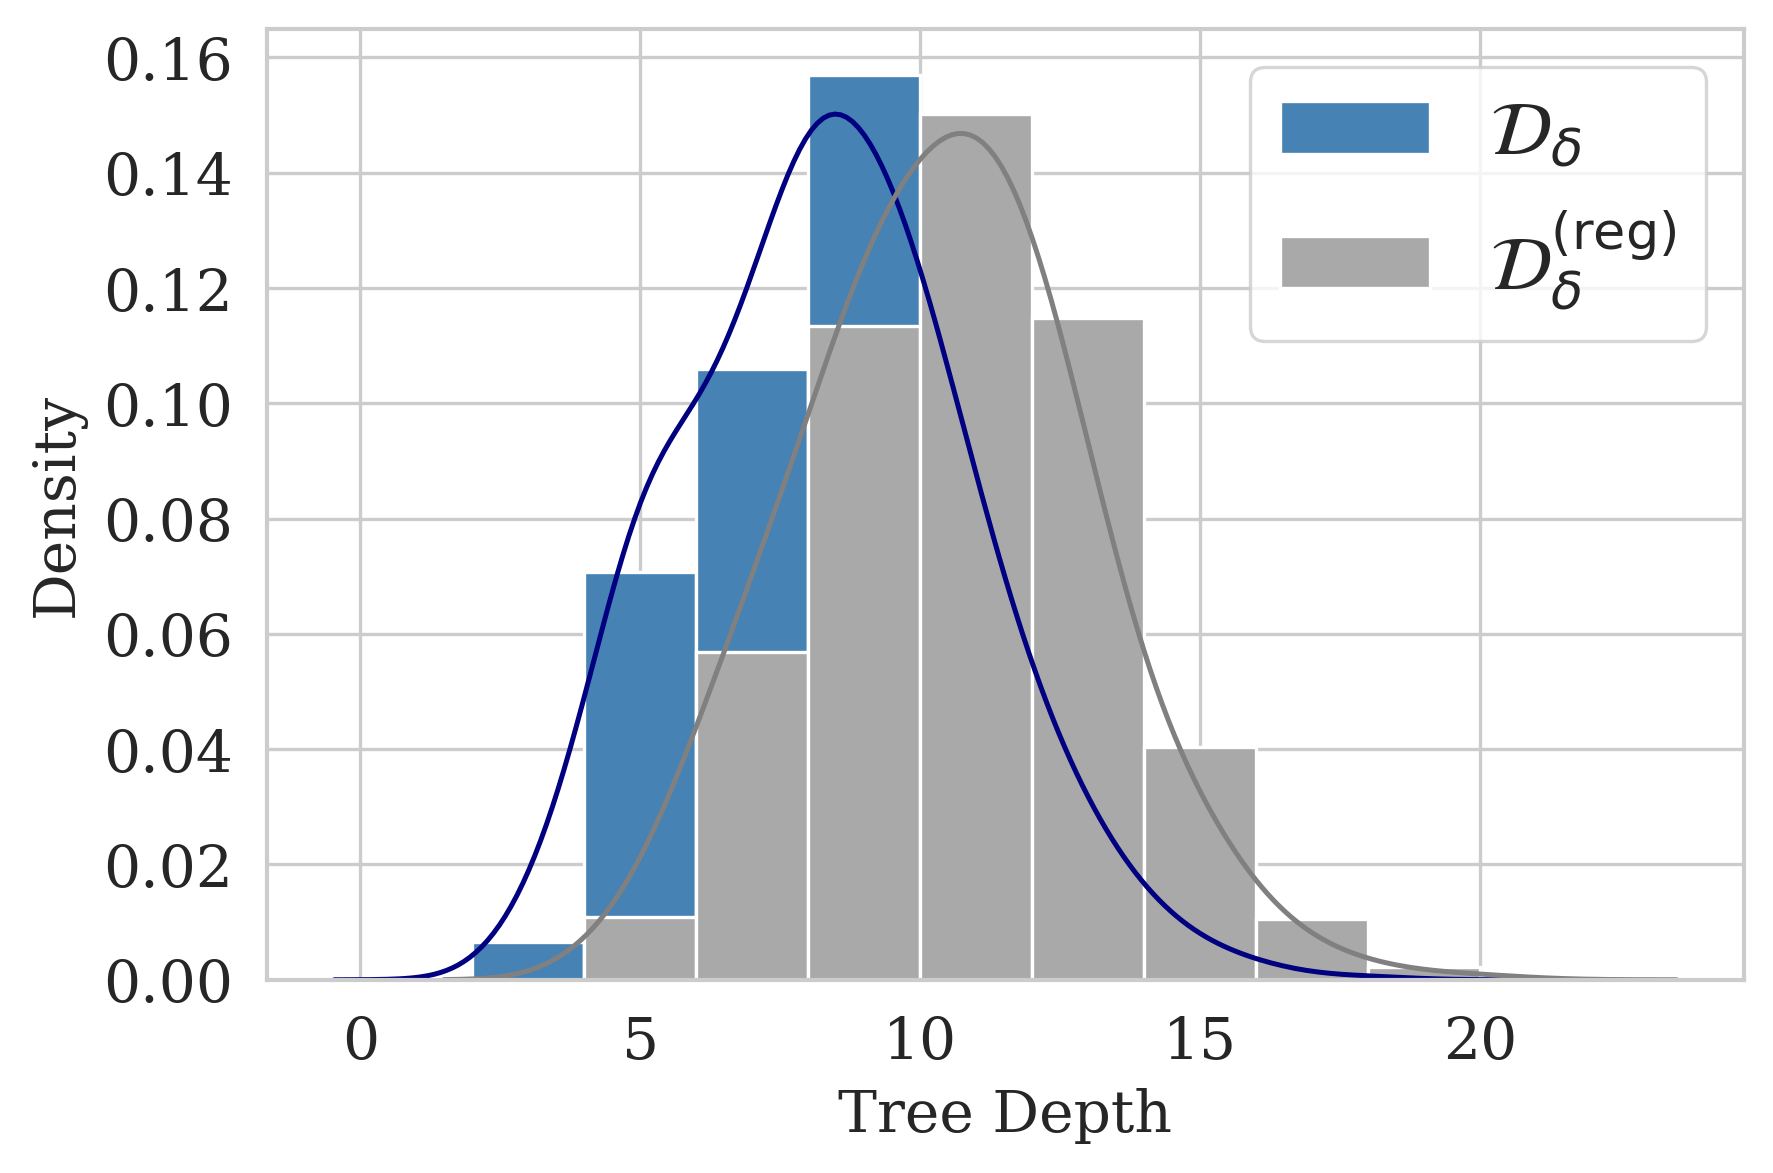

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])

fsize = 14  # Base font size for labels and ticks

# Gather all tree depths for the first set of models
all_depths = []
for model in all_models:
    for estimator in model.estimators_:
        all_depths.append(estimator.tree_.max_depth)

# Gather all tree depths for the second set of models
all_depths_reg = []
for model in all_models_regularization:
    for estimator in model.estimators_:
        all_depths_reg.append(estimator.tree_.max_depth)

# Create a single figure
plt.figure(dpi=300, facecolor="white")

# Plot histogram and KDE for all_models
sns.histplot(
    all_depths,
    kde=False,
    color='steelblue',
    binwidth=2,
    stat='density',
    label=r'$\mathcal{D}_{\delta}$',
    alpha=1
)
sns.kdeplot(
    all_depths,
    color='navy',
    bw_adjust=2,
)

# Plot histogram and KDE for all_models_regularization
sns.histplot(
    all_depths_reg,
    kde=False,
    color='darkgray',
    binwidth=2,
    stat='density',
    label=r'$\mathcal{D}_{\delta}^{(\mathrm{reg})}$',
    alpha=1
)
sns.kdeplot(
    all_depths_reg,
    color='gray',
    bw_adjust=2,
)

# Add labels and title
#plt.title("Overlayed Distribution of Tree Depths")
plt.xlabel("Tree Depth", fontsize=fsize)
plt.ylabel("Density", fontsize=fsize)
plt.legend(fontsize=18)

#plt.xticks(indices1, fns1, rotation=25, fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

# Optional: set common x-limits if desired
combined_data = all_depths + all_depths_reg
#plt.xlim(min(combined_data), max(combined_data))

plt.tight_layout()
#plt.show()

# Print statistics
print("All Models Median Depth:", np.median(all_depths))
print("All Models Average Depth:", np.mean(all_depths))

print("Regularized Models Median Depth:", np.median(all_depths_reg))
print("Regularized Models Average Depth:", np.mean(all_depths_reg))

# Save the figure in both EPS and PNG formats with high resolution
plt.savefig(
    'regularization_tree_depth_digits.eps',
    format='eps',
    dpi=300,
    pad_inches=.1,
    bbox_inches='tight'
)

##### Distribution of Tree Variety in RF Ensembles (Expanded Formalism from the Shorter Paper Version)

Let the model $m$ be composed of $n$ trees. For each tree $i \in \{1, 2, \ldots, n\}$, we have a count vector of features $\mathbf{v}_i \in \mathbb{R}^d$, where $d$ is the number of features. Each entry $v_{i,k}$ in the vector $\mathbf{v}_i$ represents how many times feature $k$ was used in tree $i$.

The Euclidean distance between two trees $i$ and $j$ is given by:

$$
\text{distance}(\mathbf{v}_i, \mathbf{v}_j) = || \mathbf{v}_i - \mathbf{v}_j ||_2 = \sqrt{\sum_{k=1}^{d} (v_{i,k} - v_{j,k})^2}.
$$

To quantify the total variety within model $m$, we sum the pairwise distances over all unique pairs of distinct trees:

$$
V(m) = \sum_{1 \leq i < j \leq n} || \mathbf{v}_i - \mathbf{v}_j ||_2.
$$

In other words, $V(m)$ is the sum of the Euclidean distances between every pair of trees' feature count vectors within the model. This value captures how diverse or varied the trees are with respect to their usage of features.

When we have multiple models (e.g., a list of models $\{m_1, m_2, \ldots, m_M\}$), each with a calculated variety measure $V(m_i)$ as described previously, we can consider these variety values across all models as forming a distribution. Concretely, if each model $m_i$ consists of $n_i$ trees, we compute the total variety:

$$
V(m_i) = \sum_{1 \leq p < q \leq n_i} \| \mathbf{v}_p - \mathbf{v}_q \|_2,
$$

where $\mathbf{v}_p$ and $\mathbf{v}_q$ are the feature usage vectors for the $p$-th and $q$-th trees in model $m_i$.

No Regularization Models:
  Mean:      5.2734
  Median:    4.8990
  Variance:  5.7669
  Std Dev:   2.4014
  Skewness:  0.7413
  Kurtosis:  0.3772

Regularization Models:
  Mean:      7.6714
  Median:    7.3485
  Variance:  8.1875
  Std Dev:   2.8614
  Skewness:  0.5673
  Kurtosis:  0.2164



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


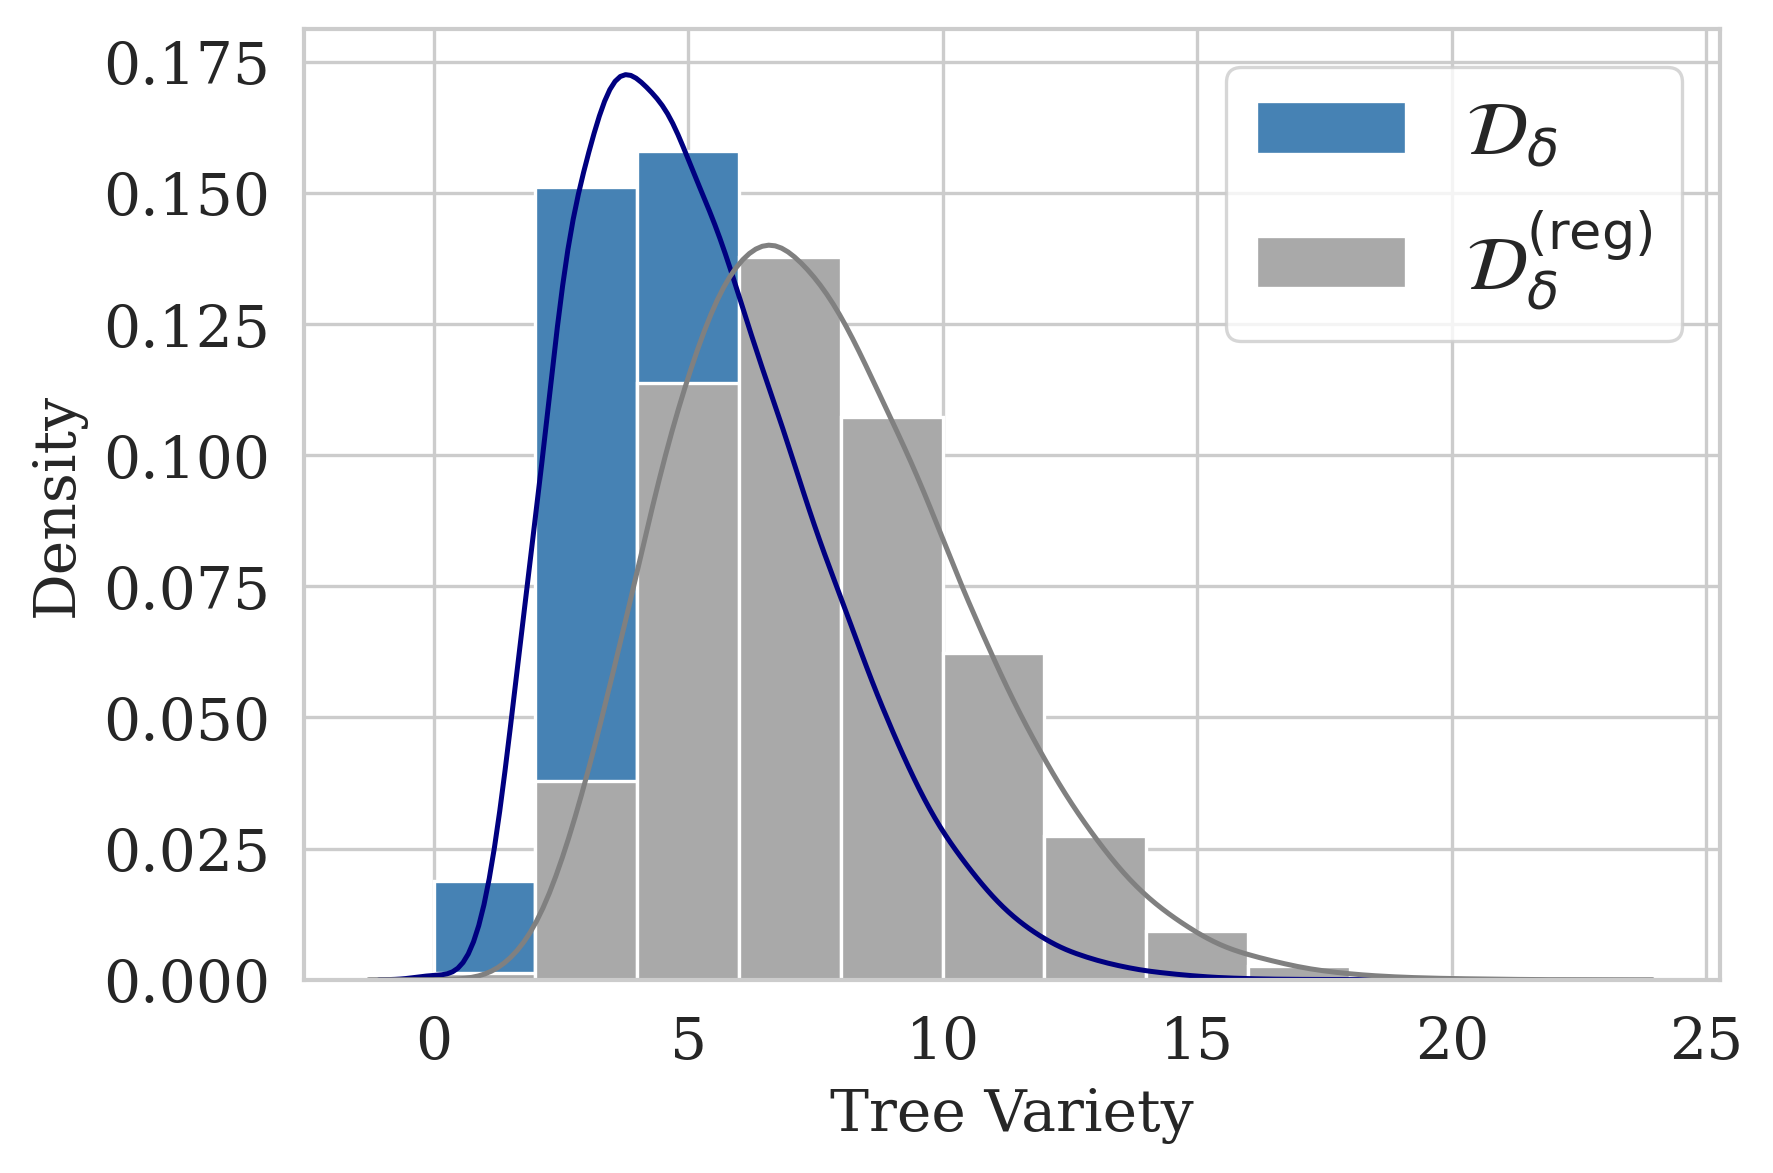

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from statistics import mean, median
from scipy.stats import skew, kurtosis
from matplotlib import rcParams

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])

fsize = 14  # Base font size for labels and ticks

def get_tree_feature_counts(rf_model):
    """
    Extracts a count vector for each tree that indicates how many times each feature 
    was used as a splitting feature in that tree.
    """
    n_features = rf_model.n_features_in_
    tree_feature_counts = []
    for estimator in rf_model.estimators_:
        # The feature array for each tree: tree_.feature
        # Count how often each feature is used (ignore leaves marked as -2)
        feature_usage = estimator.tree_.feature
        counts = np.bincount(feature_usage[feature_usage >= 0], minlength=n_features)
        tree_feature_counts.append(counts)
    return np.array(tree_feature_counts)

def compute_pairwise_distances(tree_feature_counts):
    """
    Computes the pairwise Euclidean distances between all trees in the forest.
    Returns a flattened array of distances (excluding diagonal).
    """
    distances = pdist(tree_feature_counts, metric='euclidean')
    return distances

def aggregate_model_distances(models):
    """
    Compute aggregated pairwise distances for each model in a list of models.
    Returns a list of arrays, where each array contains all pairwise distances for a model.
    """
    all_distances = []
    for m in models:
        tree_counts = get_tree_feature_counts(m)
        dist = compute_pairwise_distances(tree_counts)
        all_distances.append(dist)
    return all_distances

# Example usage:
# Suppose all_models and all_models_regularization are defined and fitted.
# all_models = [...]
# all_models_regularization = [...]

# Compute distances for both sets
all_distances_no_reg = aggregate_model_distances(all_models)
all_distances_reg = aggregate_model_distances(all_models_regularization)

# Flatten all distances across models
flat_no_reg_distances = np.concatenate(all_distances_no_reg)
flat_reg_distances = np.concatenate(all_distances_reg)

# Compute summary statistics
def print_distribution_stats(name, data):
    m_mean = np.mean(data)
    m_median = np.median(data)
    m_var = np.var(data, ddof=1)   # Sample variance
    m_std = np.std(data, ddof=1)   # Sample standard deviation
    m_skew = skew(data)
    m_kurt = kurtosis(data, fisher=True)  # Fisher's definition (excess kurtosis)
    
    print(f"{name}:")
    print(f"  Mean:      {m_mean:.4f}")
    print(f"  Median:    {m_median:.4f}")
    print(f"  Variance:  {m_var:.4f}")
    print(f"  Std Dev:   {m_std:.4f}")
    print(f"  Skewness:  {m_skew:.4f}")
    print(f"  Kurtosis:  {m_kurt:.4f}")
    print()

print_distribution_stats("No Regularization Models", flat_no_reg_distances)
print_distribution_stats("Regularization Models", flat_reg_distances)

# ------------------------- SINGLE OVERLAID HISTOGRAM -------------------------
plt.figure(dpi=300, facecolor="white")

# Plot histogram & KDE for No Regularization
sns.histplot(
    flat_no_reg_distances, 
    kde=False, 
    color='steelblue', 
    binwidth=2,    # Adjust as desired
    stat='density', 
    label=r'$\mathcal{D}_{\delta}$', 
    alpha=1
)
sns.kdeplot(
    flat_no_reg_distances, 
    color='navy', 
    bw_adjust=2,    # Smoothness factor, adjust as desired
)

# Plot histogram & KDE for With Regularization
sns.histplot(
    flat_reg_distances, 
    kde=False, 
    color='darkgray', 
    binwidth=2,    # Adjust as desired
    stat='density', 
    label=r'$\mathcal{D}_{\delta}^{(\mathrm{reg})}$', 
    alpha=1
)
sns.kdeplot(
    flat_reg_distances, 
    color='gray', 
    bw_adjust=2,     # Smoothness factor, adjust as desired
)

#plt.title("Overlayed Distribution of Pairwise Tree Distances")
plt.xlabel("Tree Variety", fontsize=fsize)
plt.ylabel("Density", fontsize=fsize)
plt.legend(fontsize=18)

combined = np.concatenate((flat_no_reg_distances, flat_reg_distances))
#plt.xlim([min(combined), max(combined)])

plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

plt.tight_layout()
#plt.show()

# Save the figure in both EPS and PNG formats with high resolution
plt.savefig(
    'regularization_tree_distance_digits.eps',
    format='eps',
    dpi=300,
    pad_inches=.1,
    bbox_inches='tight'
)

#### iterate `max_features` and see how implicit regularization compares 

In [13]:
import pandas as pd 
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Digits dataset
data = load_digits()
X_full = pd.DataFrame(data.data)
y_full = pd.Series(data.target)

# Define the feature subsets
#subset_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]  # Smaller subset of features
subset_indices = [2, 3, 4, 5, 11, 12]  # Smaller subset of features
num_features = len(subset_indices)

# Generate digit pairs
digit_pairs = list(itertools.permutations(range(10), 2))

num_constants = 20
max_feat_no_const = num_features
max_feat_const = num_features + 15

def train_evaluate_model(X_train, X_test, y_train, y_test, feature_subset, add_constants, max_features):
    # Select the subset of features
    X_train_subset = X_train.iloc[:, feature_subset].copy()
    X_test_subset = X_test.iloc[:, feature_subset].copy()

    if add_constants:
        const_value = 0
        for i in range(num_constants):
            X_train_subset[f'const_{i}'] = const_value
            X_test_subset[f'const_{i}'] = const_value

    # Train the model with given max_features
    if add_constants is False and max_features > max_feat_no_const:
        max_features = max_feat_no_const
        
    model = RandomForestClassifier(random_state=42, 
                                   class_weight='balanced', 
                                   max_features=max_features,
                                   max_depth=100,
                                   n_estimators=100)
    model.fit(X_train_subset, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# For each max_features from 1 to number of subset features, we will compute average accuracy
accuracy_no_const = []
accuracy_const = []

for mf in range(1, max_feat_const):
    acc_no_const_list = []
    acc_const_list = []
    
    # Evaluate across all digit pairs to get an average performance
    for digit_1, digit_2 in digit_pairs:
        # Filter data for this pair
        pair_mask = (y_full == digit_1) | (y_full == digit_2)
        X_pair_full = X_full[pair_mask]
        y_pair = y_full[pair_mask].replace({digit_1: 0, digit_2: 1})
        
        X_train_full, X_test_full, y_train, y_test = train_test_split(
            X_pair_full, y_pair, test_size=0.2, random_state=42
        )
        
        # Accuracy without constants
        acc_no_const_cur = train_evaluate_model(
            X_train_full, X_test_full, y_train, y_test, subset_indices, add_constants=False, max_features=mf
        )
        acc_no_const_list.append(acc_no_const_cur)

        # Accuracy with constants
        acc_const_cur = train_evaluate_model(
            X_train_full, X_test_full, y_train, y_test, subset_indices, add_constants=True, max_features=mf
        )
        acc_const_list.append(acc_const_cur)

    # Average accuracy over all digit pairs
    accuracy_no_const.append(np.mean(acc_no_const_list))
    accuracy_const.append(np.mean(acc_const_list))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


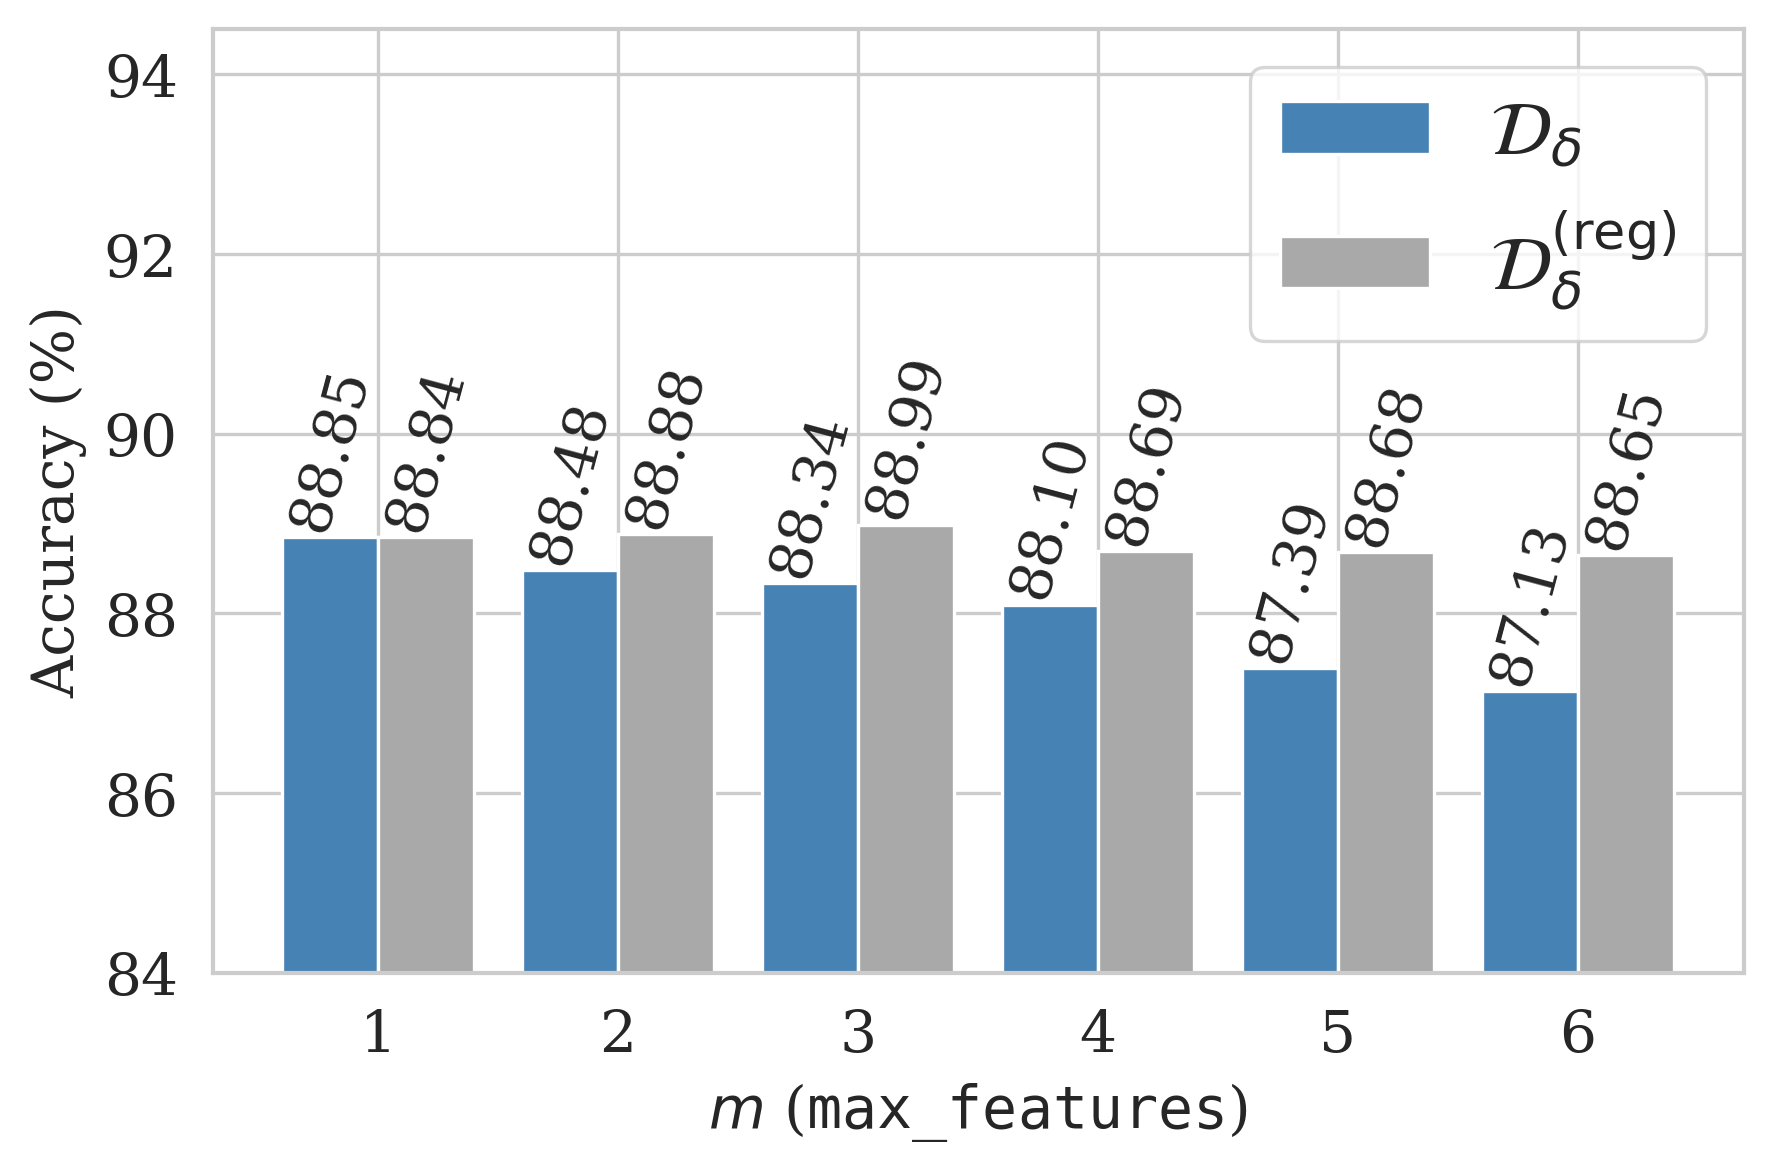

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns

sns.set(style="whitegrid", context="paper")

#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
# Use Type 1 fonts in PDFs and set serif fonts for consistency
rcParams['pdf.use14corefonts'] = True  
#plt.rc('text', usetex=True)  # Enable LaTeX for text rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{lmodern}'
plt.rc('font', family='serif')
#plt.rc('font', serif=['Computer Modern Roman'])


anc = accuracy_no_const  # e.g. [0.877, 0.885, …]
ac  = accuracy_const     # e.g. [0.892, 0.901, …]

# Only keep the first 6 entries
anc = anc[:6]
ac  = ac[:6]

# 1) Convert proportions to percentages
anc_percent = [val * 100 for val in anc]
ac_percent  = [val * 100 for val in ac]

fsize = 14  # Base font size for labels and ticks

# --- Create figure ---
# Use a larger figure size with high DPI and a white background
plt.figure(dpi=300, facecolor="white")

# 4) Prepare x positions and bar width
x_values = np.arange(1, len(anc_percent) + 1)
bar_width = 0.4

# 5) Create the figure
#plt.figure(figsize=(10, 6), facecolor="white")

# 6) Plot the two bar‐sets in LaTeX mode
bars1 = plt.bar(
    x_values - bar_width / 2,
    anc_percent,
    width=bar_width,
    label=r'$\mathcal{D}_{\delta}$',
    color='steelblue',
    alpha=1
)
bars2 = plt.bar(
    x_values + bar_width / 2,
    ac_percent,
    width=bar_width,
    label=r'$\mathcal{D}_{\delta}^{(\mathrm{reg})}$',
    color='darkgray',
    alpha=1
)

# 7) Annotate each bar with its height (escape % as \%)
for bar in bars1:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}',   # <-- ESCAPED \% for LaTeX
        ha='center',
        va='bottom',
        fontsize=fsize,
        rotation=75
    )

for bar in bars2:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}',   # <-- ESCAPED \% for LaTeX
        ha='center',
        va='bottom',
        fontsize=fsize,
        rotation=75
    )

# 8) Labels, ticks, legend (all in LaTeX mode)
plt.xlabel(r'$m$ ($\mathtt{max\_features}$)', fontsize=fsize)
plt.ylabel(r'Accuracy (%)', fontsize=fsize)   # <-- ESCAPED \% here too
plt.xticks(x_values, fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.legend(loc='upper right', fontsize=18)

# 9) Adjust y‐axis range to match percentage scale (e.g., 85%–92%)
plt.ylim(84, 94.5)
#plt.yticks(np.arange(85.0, 94.0, 1.0))  # manually specify ticks every 1.0
# plt.yticks(np.arange(85.0, 94.0, 1.0))  # Tick every 1.0
# plt.gca().set_yticklabels([f"{y:.1f}" for y in np.arange(85.0, 94.0, 1.0)])

plt.tight_layout()

# 10) Save to PNG and EPS
plt.savefig(
    "max_features_iter_bar_with_values_digits.eps",
    format="eps",
    dpi=300,
    pad_inches=0.1,
    bbox_inches='tight'
)

# plt.show()
